In [16]:
import os
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.patches import Patch
import mpl_stylesheet
import re
import gc
mpl_stylesheet.banskt_presentation(fontfamily = 'mono', fontsize = 20, colors = 'banskt', dpi = 300)

In [17]:
# Load the data
import json
import collections

datadict = collections.defaultdict(dict)
for record in SeqIO.parse("disprot_OK_fullset.fasta", "fasta"):
    uniprot_id = record.id
    seq = str(record.seq)
    datadict[uniprot_id]['seq'] = seq

for record in SeqIO.parse("disprot_OK_fullset_annotations.fasta", "fasta"):
    uniprot_id = record.id
    seq = str(record.seq)
    datadict[uniprot_id]['disorder'] = seq

print(f"Loaded {len(datadict.keys())} proteins")

Loaded 2145 proteins


In [18]:

uniprots = list(datadict.keys())
delcounter = 0
for unip in uniprots:
    thisdel = 0

    lossfileESM2 = f"loss_ESM2/{unip}.json"
    if os.path.exists(lossfileESM2):
        with open(lossfileESM2) as instrm:
            lossdict = json.load(instrm)
        datadict[unip]["ESM2"] = dict()
        datadict[unip]["ESM2"]["aamask_1"] = lossdict[unip]["aamask_1"]
    else:
        print(f"Could not find ESM2 {unip}")
        thisdel += 1
        
    lossfileT5 = f"loss/{unip}.json"
    if os.path.exists(lossfileT5):
        with open(lossfileT5) as instrm:
            lossdict = json.load(instrm)
        datadict[unip]["T5"] = dict()
        datadict[unip]["T5"]["aamask_1"] = lossdict[unip]["aamask_1"]
    else:
        print(f"Could not find T5 {unip}")
        thisdel += 1
    
    if thisdel == 2:
        del(datadict[unip])

print(f"Loaded {len(datadict.keys())} proteins")

Could not find ESM2 Q86VN1
Could not find ESM2 Q5R6Q2
Could not find ESM2 Q9X8U3
Could not find ESM2 P0CE48
Could not find ESM2 P34087
Could not find ESM2 Q14118
Could not find ESM2 P36578
Could not find ESM2 Q15113
Could not find ESM2 O08908
Could not find ESM2 Q92973
Could not find ESM2 P69490
Could not find ESM2 P15516
Could not find ESM2 Q7B2Z6
Could not find ESM2 P10451
Could not find ESM2 Q58667
Could not find ESM2 Q9Z0U4
Could not find ESM2 P01071
Could not find ESM2 P18272
Could not find ESM2 Q99598
Could not find ESM2 P11473
Could not find ESM2 P63090
Could not find ESM2 P49918
Could not find ESM2 Q07108
Could not find ESM2 Q5ZUV9
Could not find ESM2 Q9Y7M4
Could not find ESM2 P05121
Could not find ESM2 Q9N4U5
Could not find ESM2 P07567
Could not find ESM2 A0A0H2ZP82
Could not find ESM2 Q96IZ0
Could not find ESM2 P21246
Could not find ESM2 P39926
Could not find ESM2 Q01924
Could not find ESM2 Q67953
Could not find ESM2 O35718
Could not find ESM2 Q8N300
Could not find ESM2 P783

Could not find ESM2 Q9UBU9
Could not find ESM2 Q8RNT4
Could not find ESM2 Q13148
Could not find ESM2 P51965
Could not find ESM2 Q01844
Could not find ESM2 Q9XTN4
Could not find ESM2 P49765
Could not find ESM2 P05387
Could not find ESM2 P07766
Could not find ESM2 P55210
Could not find ESM2 J7M799
Could not find ESM2 P83110
Could not find ESM2 P63098
Could not find ESM2 Q9QXT8
Could not find ESM2 P52874
Could not find ESM2 Q06253
Could not find ESM2 Q89933
Could not find ESM2 Q9BXW4
Could not find ESM2 Q6SJQ7
Could not find ESM2 P00514
Could not find ESM2 P70447
Could not find ESM2 P00742
Could not find ESM2 P35521
Could not find ESM2 A0A178W0D3
Could not find ESM2 P47523
Could not find ESM2 Q9ERE7
Could not find ESM2 Q06208
Could not find ESM2 P09950
Could not find ESM2 P78794
Could not find ESM2 P47710
Could not find ESM2 M5BF30
Could not find ESM2 Q9UNA0
Could not find ESM2 P15825
Could not find ESM2 Q9SR19
Could not find ESM2 Q63450
Could not find ESM2 Q8R1S4
Could not find ESM2 A6ND

Could not find ESM2 P53563
Could not find ESM2 P76216
Could not find ESM2 P51946
Could not find ESM2 P27088
Could not find ESM2 P12504
Could not find ESM2 P08670
Could not find ESM2 Q13526
Could not find ESM2 Q9UKK9
Could not find ESM2 Q86FP9
Could not find ESM2 P59636
Could not find ESM2 N1NXA6
Could not find ESM2 P13255
Could not find ESM2 P48443
Could not find ESM2 P36080
Could not find ESM2 C4M0U8
Could not find ESM2 O60888
Could not find ESM2 O95644
Could not find ESM2 Q9T0N8
Could not find ESM2 P09651
Could not find ESM2 P02533
Could not find ESM2 C6KEI3
Could not find ESM2 P03437
Could not find ESM2 P32499
Could not find ESM2 P08476
Could not find ESM2 Q9H5I1
Could not find ESM2 Q13563
Could not find ESM2 Q15382
Could not find ESM2 Q9SQK3
Could not find ESM2 A0L5S6
Could not find ESM2 Q16222
Could not find ESM2 P30793
Could not find ESM2 P56777
Could not find ESM2 P06782
Could not find ESM2 P0A9Q9
Could not find ESM2 Q9Z1X4
Could not find ESM2 P04177
Could not find ESM2 Q91V27
C

Could not find ESM2 P9WPI9
Could not find ESM2 P56210
Could not find ESM2 P14598
Could not find ESM2 Q16576
Could not find ESM2 P04271
Could not find ESM2 B7T1D9
Could not find ESM2 P05451
Could not find ESM2 P36100
Could not find ESM2 Q9U3N4
Could not find ESM2 Q14995
Could not find ESM2 P31749
Could not find ESM2 P0A7S3
Could not find ESM2 P07214
Could not find ESM2 Q12972
Could not find ESM2 Q8IV16
Could not find ESM2 P05318
Could not find ESM2 P30307
Could not find ESM2 P42866
Could not find ESM2 P04591
Could not find ESM2 P25644
Could not find ESM2 Q8NQJ3
Could not find ESM2 Q9SLJ2
Could not find ESM2 P56254
Could not find ESM2 P19957
Could not find ESM2 P52926
Could not find ESM2 Q9SQZ9
Could not find ESM2 Q9BRX5
Could not find ESM2 Q9CXY6
Could not find ESM2 Q06710
Could not find ESM2 B8YB65
Could not find ESM2 Q92804
Could not find ESM2 P0A6G1
Could not find ESM2 Q9SN68
Could not find ESM2 P10279
Could not find ESM2 O66858
Could not find ESM2 Q9BYI3
Could not find ESM2 P41351
C

Could not find ESM2 Q9IK92
Could not find ESM2 Q08209
Could not find ESM2 P51449
Could not find ESM2 P43629
Could not find ESM2 Q05140
Could not find ESM2 Q9Y258
Could not find ESM2 Q6FI81
Could not find ESM2 Q6CSX2
Could not find ESM2 P37455
Could not find ESM2 B0Y813
Could not find ESM2 P60723
Could not find ESM2 Q02629
Could not find ESM2 P0C077
Could not find ESM2 Q99P68
Could not find ESM2 A0A3S5Y0Q5
Could not find ESM2 P82804
Could not find ESM2 P47910
Could not find ESM2 Q6P1M3
Could not find ESM2 Q8N488
Could not find ESM2 P45379
Could not find ESM2 Q9SUM3
Could not find ESM2 P97427
Could not find ESM2 Q9UKV8
Could not find ESM2 Q9NPF0
Could not find ESM2 P69723
Could not find ESM2 P39900
Could not find ESM2 P22216
Could not find ESM2 P04325
Could not find ESM2 P08294
Could not find ESM2 Q9BUL9
Could not find ESM2 P08235
Could not find ESM2 P00880
Could not find ESM2 Q921Z5
Could not find ESM2 Q92837
Could not find ESM2 Q05320
Could not find ESM2 Q03653
Could not find ESM2 Q9EP

Could not find ESM2 Q9NWW9
Could not find ESM2 P23457
Could not find ESM2 Q9H211
Could not find ESM2 P9WNR7
Could not find ESM2 O00429-3
Could not find ESM2 Q9WZ73
Could not find ESM2 Q8VHC5
Could not find ESM2 P32774
Could not find ESM2 P18212
Could not find ESM2 P62495
Could not find ESM2 Q96AC1
Could not find ESM2 P39286
Could not find ESM2 P31896
Could not find ESM2 P29131
Could not find ESM2 P0AC88
Could not find ESM2 O74718
Could not find ESM2 Q99741
Could not find ESM2 Q9Y5S9
Could not find ESM2 P07986
Could not find ESM2 P15391
Could not find ESM2 P15340
Could not find ESM2 Q26997
Could not find ESM2 Q13485
Could not find ESM2 Q63K18
Could not find ESM2 P40949
Could not find ESM2 Q1K7R9
Could not find ESM2 Q13042
Could not find ESM2 Q9X0Q3
Could not find ESM2 Q05776
Could not find ESM2 P83949
Could not find ESM2 Q15910
Could not find ESM2 Q16647
Could not find ESM2 Q9BRG1
Could not find ESM2 Q8R316
Could not find ESM2 P04004
Could not find ESM2 P70444
Could not find ESM2 P04695

In [19]:
target_uniprots = ["P37840", "P04637", "P02686", "P07305", "O00488", "Q9NYB9", "P06401", "Q16186", "S6B291", "P23441"]


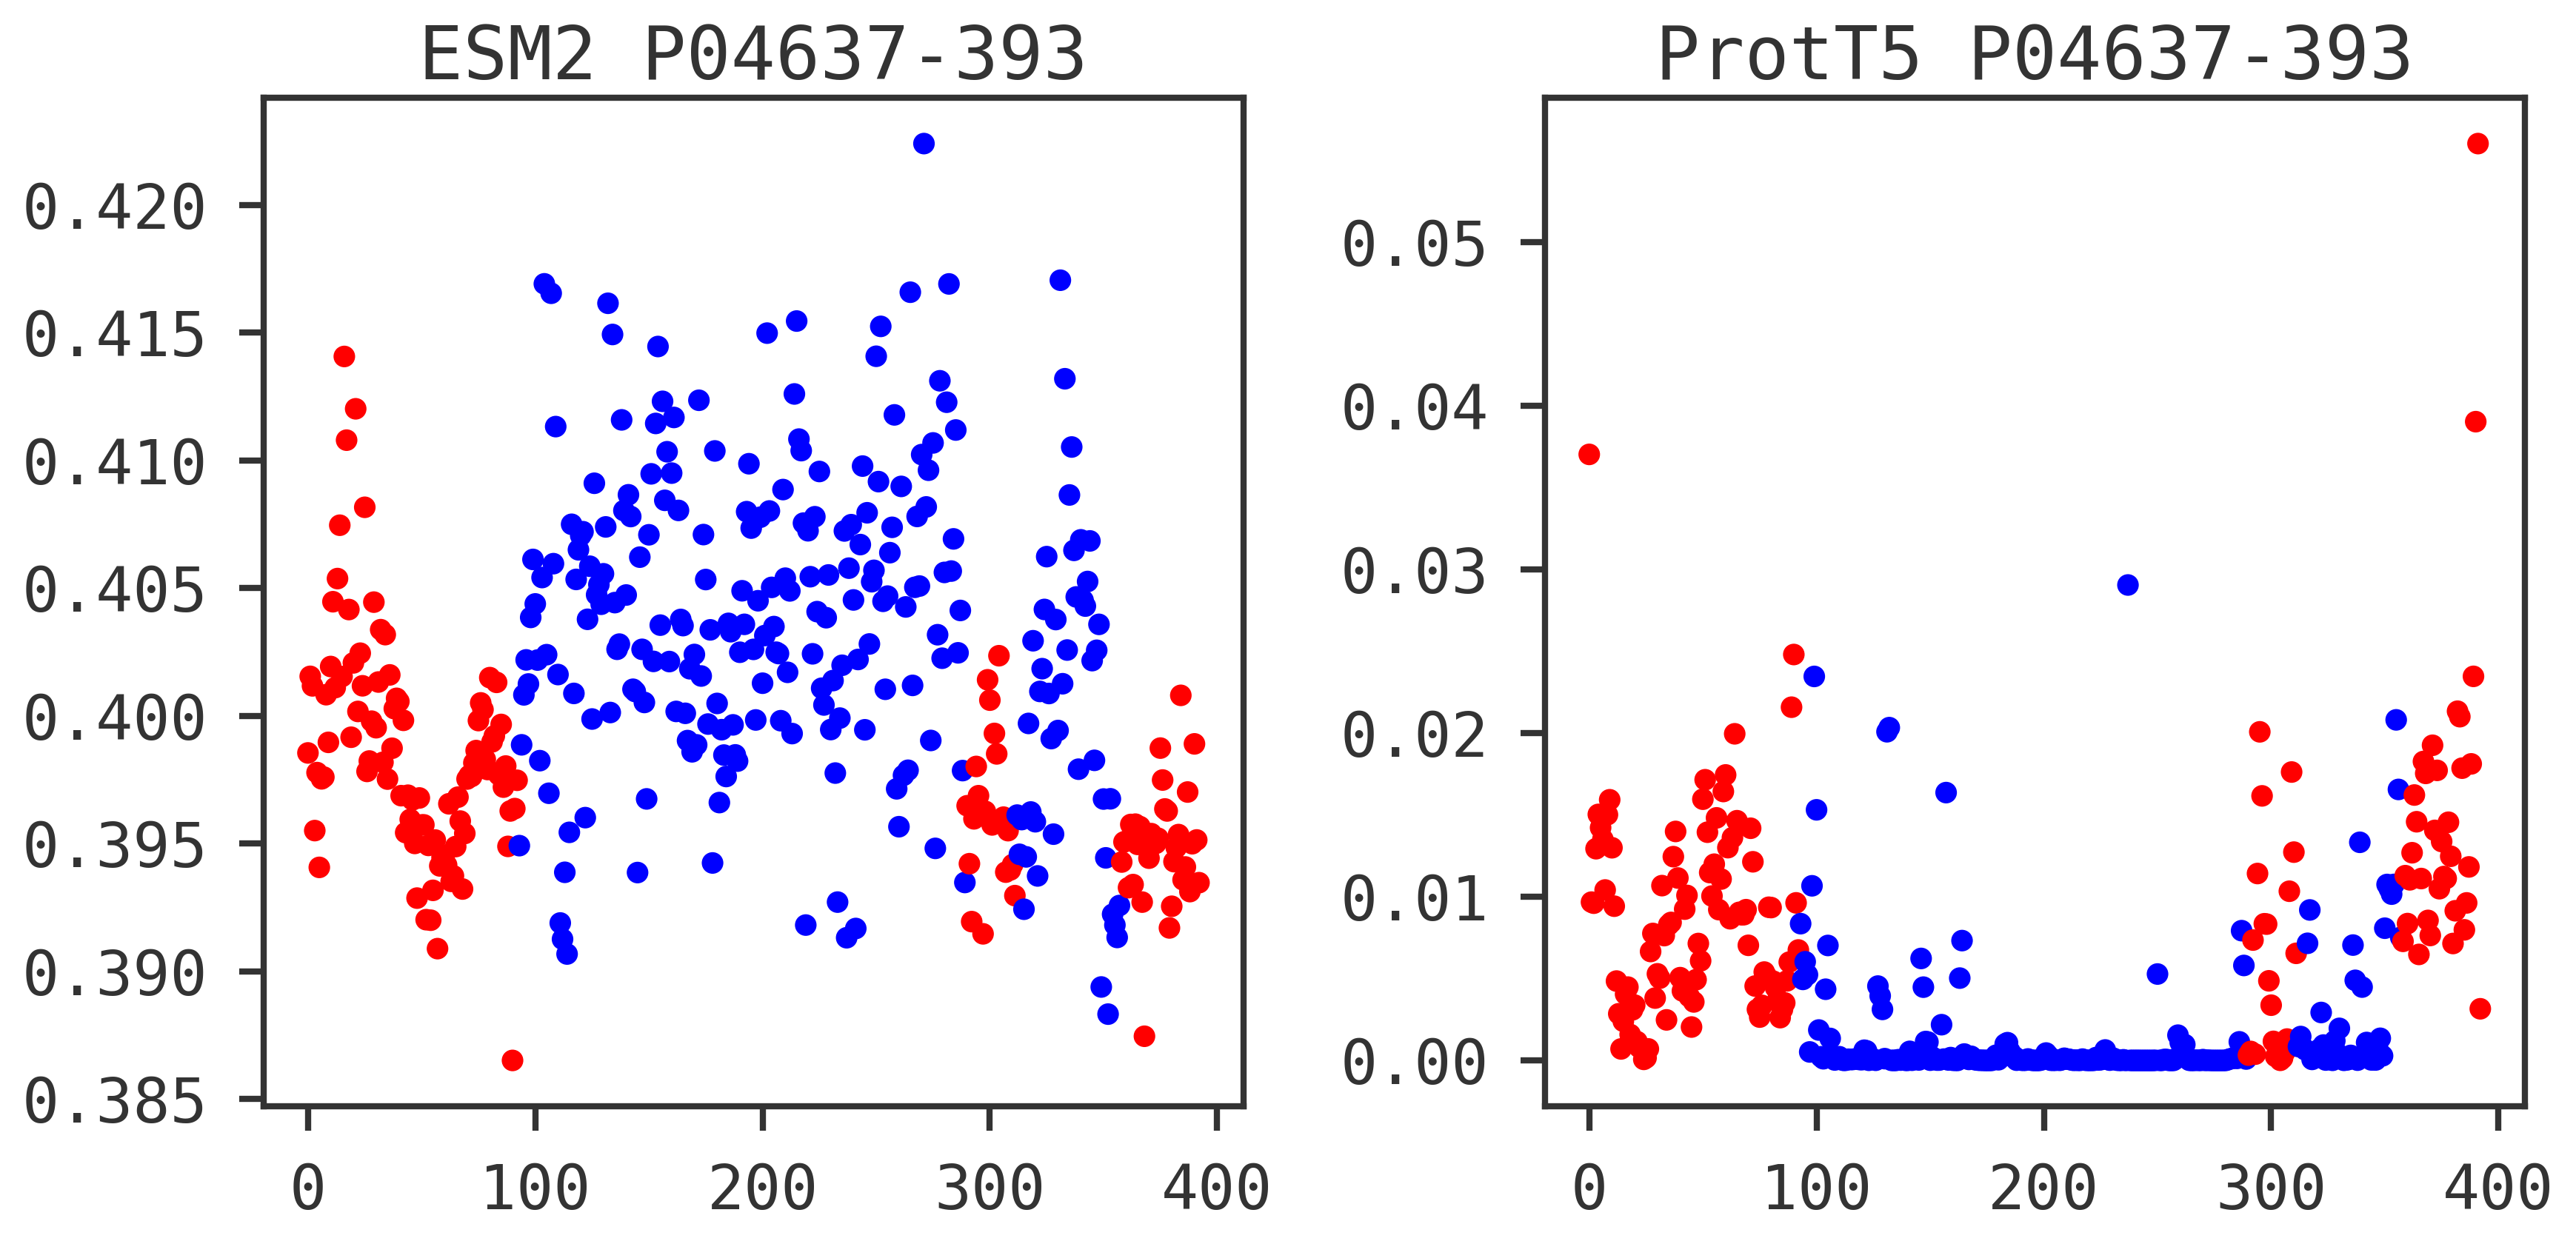

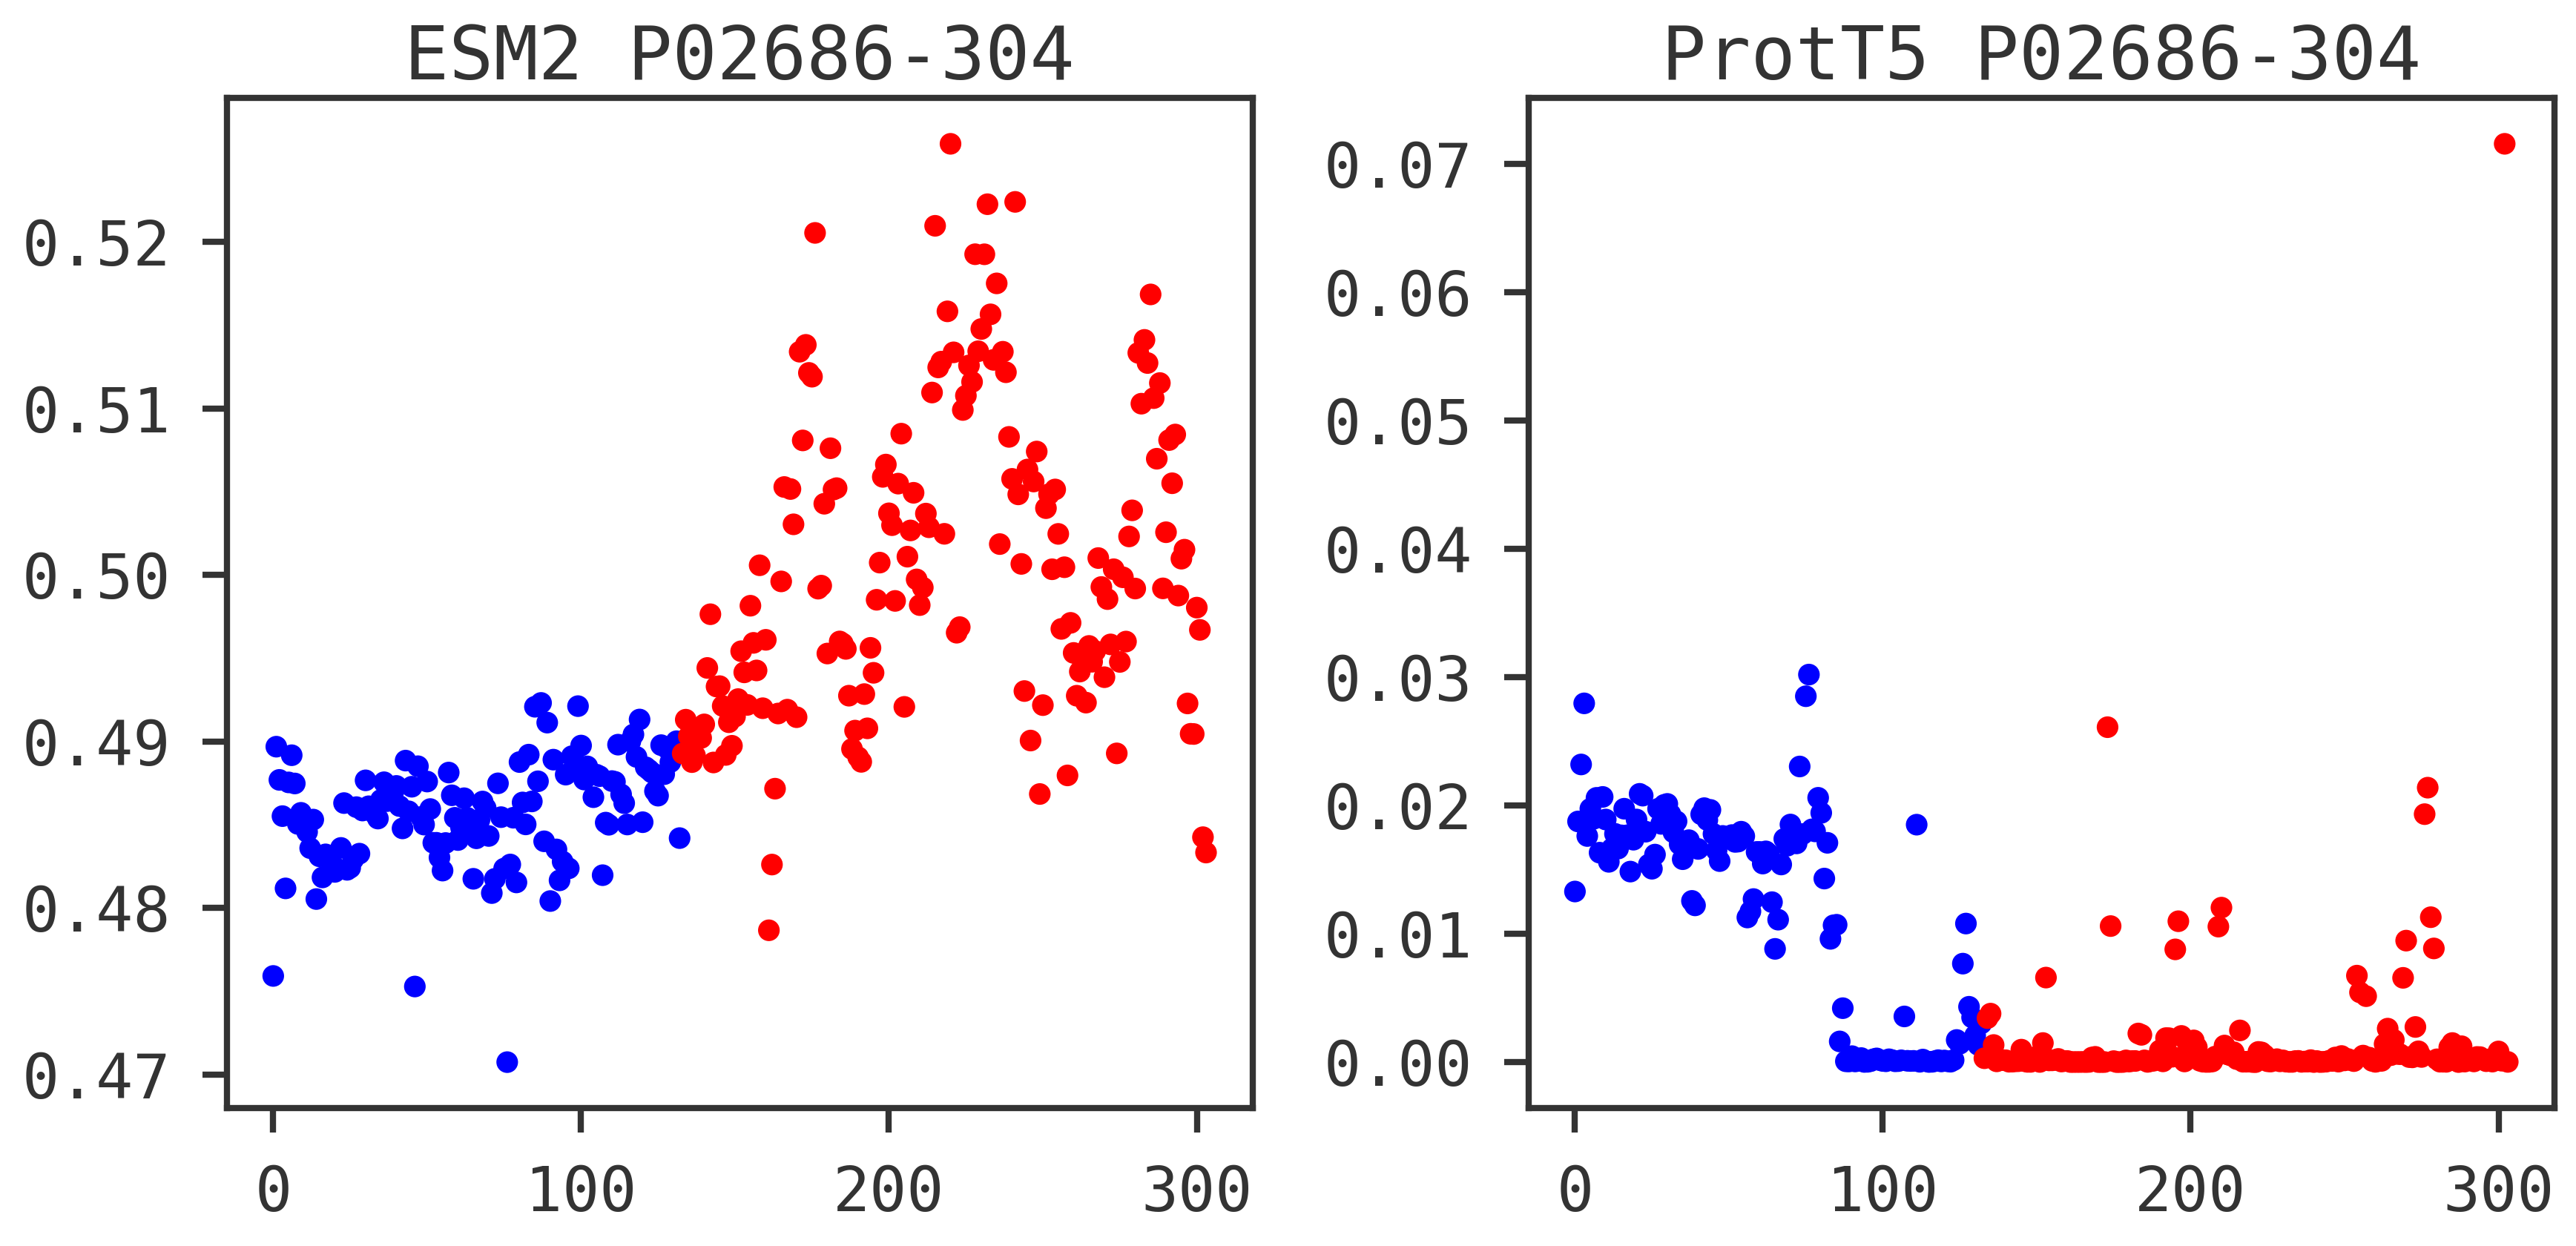

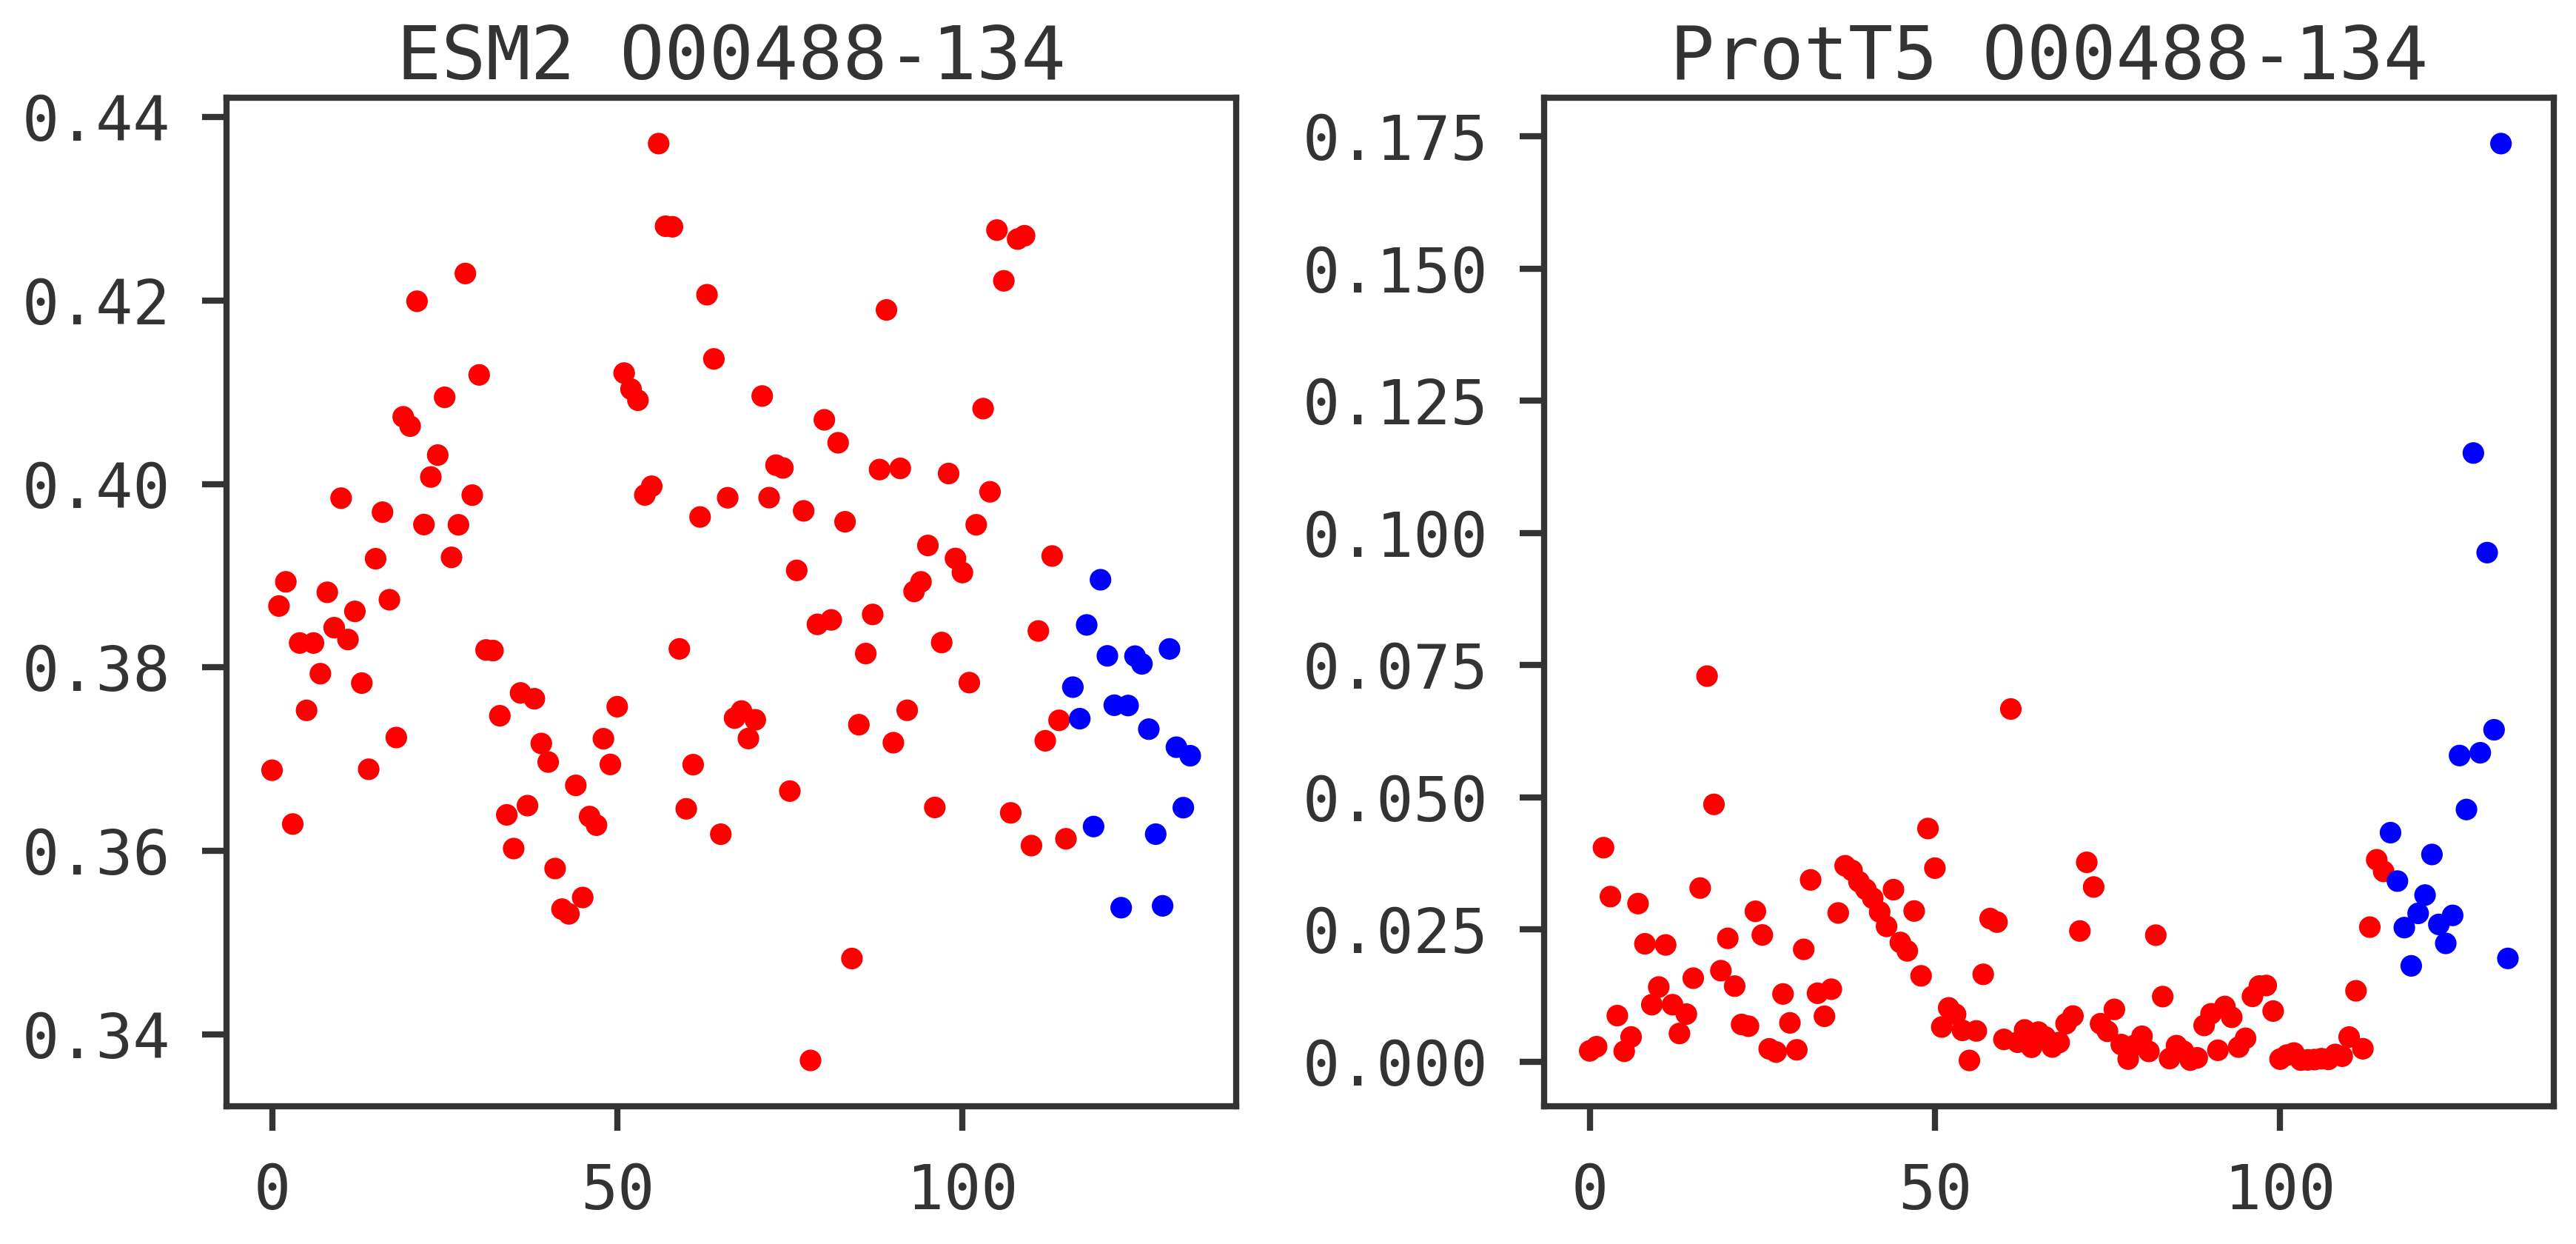

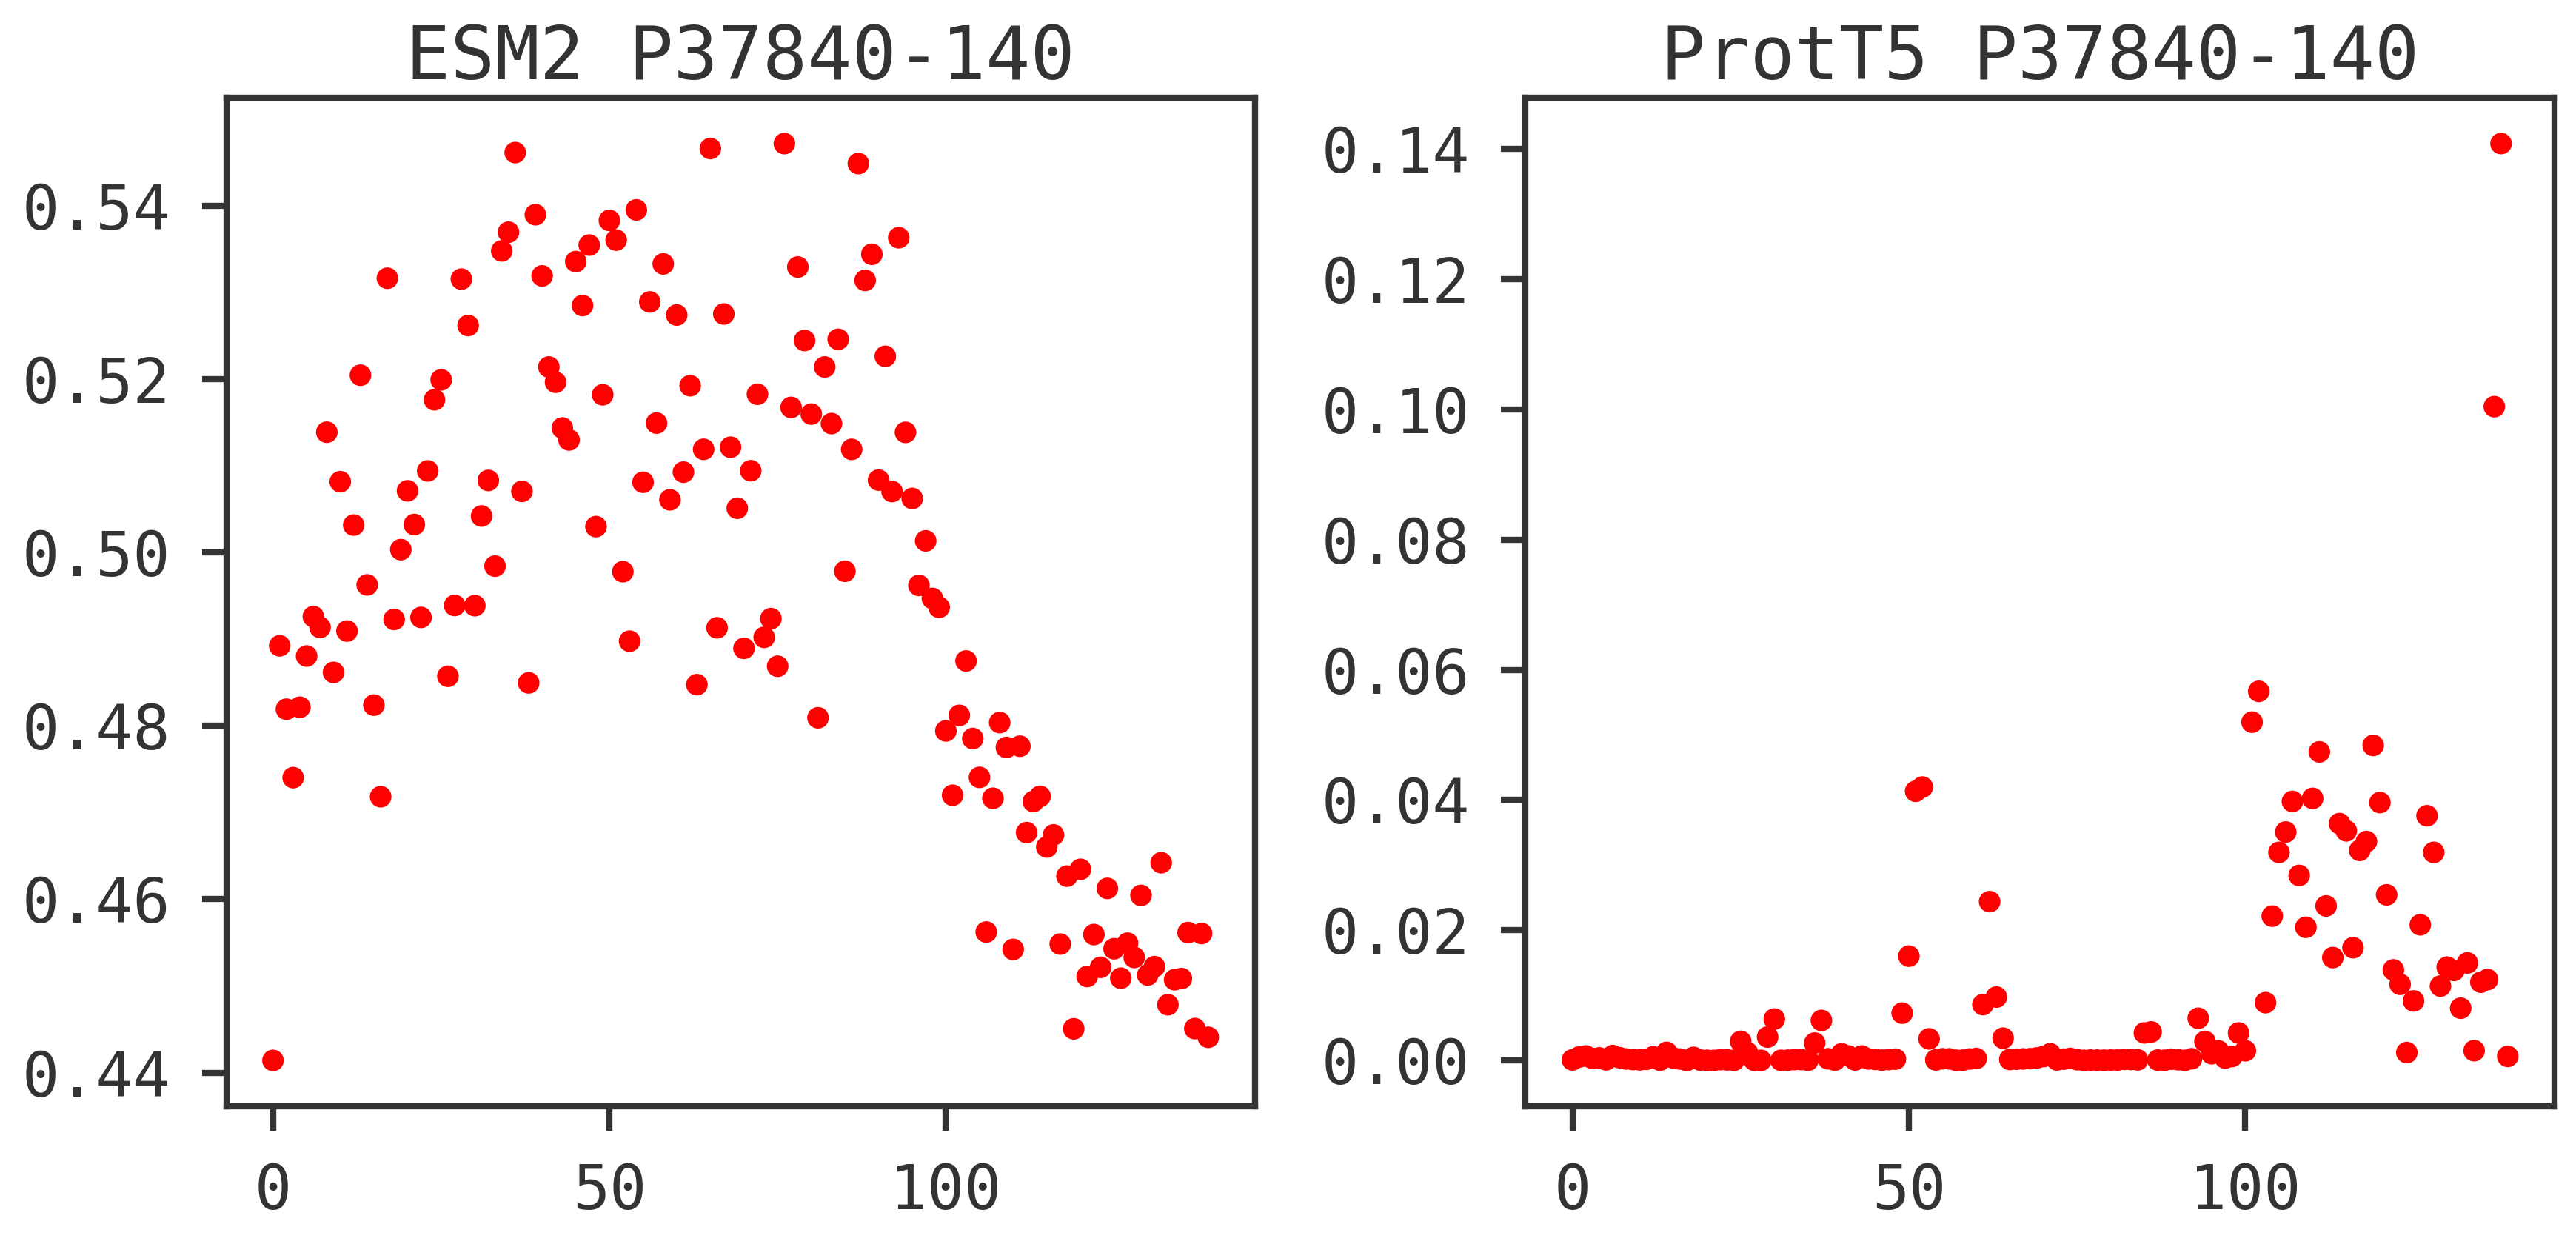

In [20]:
counter = 0
for protid in datadict:
    if protid in target_uniprots:
        if "ESM2" in datadict[protid]:
            seq = datadict[protid]['seq']
            disorder = datadict[protid]['disorder']
            dataESM2 = np.array(datadict[protid]["ESM2"]['aamask_1']['loss'])
            dataT5   = np.array(datadict[protid]["T5"]['aamask_1']['loss'])
            colorlist = list()
            for i in range(len(dataESM2)):
                if disorder[i] == "-":
                    colorlist.append("b")
                else:
                    colorlist.append("r")

            fig = plt.figure(figsize=(12,6))
            ax1  = fig.add_subplot(121)
            ax2  = fig.add_subplot(122)
            ax1.scatter(np.arange(len(dataESM2)), dataESM2, color=colorlist)
            ax2.scatter(np.arange(len(dataT5)), dataT5, color=colorlist)
            ax1.set_title(f"ESM2 {protid}-{len(seq)}")
            ax2.set_title(f"ProtT5 {protid}-{len(seq)}")
            fig.tight_layout()
            plt.show()
            counter += 1
            